In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('/content/cybersecurity_intrusion_data.csv')

In [6]:
df.sample(10)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
364,SID_00365,638,TCP,4,593.599774,NaN,0.202530,1,Firefox,0,0
4586,SID_04587,704,UDP,4,86.275938,AES,0.747991,1,Unknown,0,1
4220,SID_04221,64,UDP,3,226.033028,DES,0.516158,1,Chrome,0,0
7962,SID_07963,343,TCP,7,1128.453844,AES,0.283005,2,Chrome,0,1
6773,SID_06774,266,TCP,1,751.879581,DES,0.313137,0,Chrome,0,0
724,SID_00725,534,TCP,5,181.049271,NaN,0.250574,2,Chrome,1,0
7068,SID_07069,821,TCP,1,2428.311548,DES,0.161432,0,Chrome,0,0
758,SID_00759,328,TCP,5,472.084334,AES,0.328376,2,Chrome,0,0
5935,SID_05936,588,TCP,3,360.095483,AES,0.593391,2,Chrome,0,0
7942,SID_07943,211,TCP,4,3838.883770,AES,0.495700,1,Unknown,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df.isnull().sum()

,0
session_id,0
network_packet_size,0
login_attempts,0
session_duration,0
ip_reputation_score,0
failed_logins,0
unusual_time_access,0
attack_detected,0
protocol_type_TCP,0
protocol_type_UDP,0


In [8]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical features
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform
encoded_array = encoder.fit_transform(df[categorical_cols])

# Convert back to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded data
df = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

In [9]:
df.sample(5)

,session_id,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,protocol_type_TCP,protocol_type_UDP,encryption_used_DES,encryption_used_nan,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
7340,SID_07341,380,2,253.648768,0.129032,3,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3206,SID_03207,345,1,2620.514512,0.185466,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1068,SID_01069,406,3,517.592865,0.247956,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5020,SID_05021,488,3,470.652955,0.321012,1,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8628,SID_08629,629,2,369.588564,0.231785,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [12]:
from sklearn.ensemble import ExtraTreesClassifier

In [13]:
X = df.drop(columns=['attack_detected'])  # 'attack_detected' is the target variable
y = df['attack_detected']

In [16]:
# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-Numeric Columns:", non_numeric_cols.tolist())

Non-Numeric Columns: ['session_id']


In [17]:
# Drop non-numeric identifier columns if present
X = X.drop(columns=['session_id'], errors='ignore')

In [18]:
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)

ExtraTreesClassifier(random_state=42)

In [19]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})

In [20]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

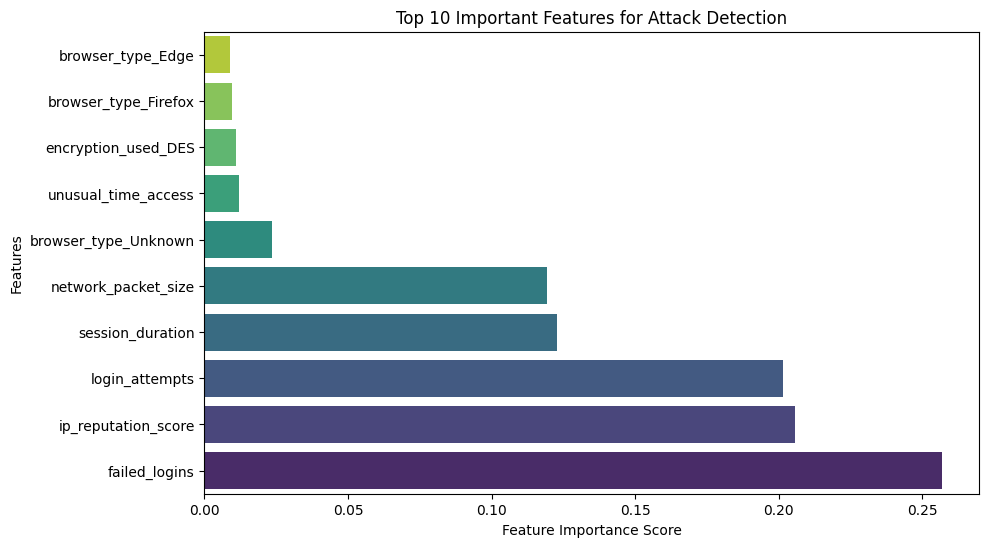

In [21]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'][:10], y=feature_importance_df['Feature'][:10], palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Important Features for Attack Detection')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [22]:
# Keep only the selected important features
selected_features = ['failed_logins', 'ip_reputation_score', 'login_attempts',
                     'session_duration', 'network_packet_size', 'unusual_time_access','encryption_used_DES']

X_selected = X[selected_features]


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [27]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7384696016771488


In [28]:
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77      1042
           1       0.74      0.65      0.69       866

    accuracy                           0.74      1908
   macro avg       0.74      0.73      0.73      1908
weighted avg       0.74      0.74      0.74      1908



In [32]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [33]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7877358490566038


In [34]:
print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1042
           1       0.76      0.77      0.77       866

    accuracy                           0.79      1908
   macro avg       0.79      0.79      0.79      1908
weighted avg       0.79      0.79      0.79      1908



In [35]:
# Train Isolation Forest (Unsupervised Model)
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)
y_pred_iso = iso_forest.predict(X_test)

# Convert Isolation Forest output (-1 = Anomaly, 1 = Normal) to match labels (0 = Normal, 1 = Attack)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

In [36]:
print("Isolation Forest Accuracy:", accuracy_score(y_test, y_pred_iso))

Isolation Forest Accuracy: 0.5864779874213837


In [37]:
print("\nIsolation Forest Report:\n", classification_report(y_test, y_pred_iso))


Isolation Forest Report:
               precision    recall  f1-score   support

           0       0.57      0.93      0.71      1042
           1       0.68      0.17      0.27       866

    accuracy                           0.59      1908
   macro avg       0.63      0.55      0.49      1908
weighted avg       0.62      0.59      0.51      1908



In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [39]:
# Use the best parameters from GridSearchCV
best_params = {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}  # Replace with your actual best parameters

# Train the Decision Tree with best parameters
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train, y_train)

# Predict on the test set
y_pred_best_dt = best_dt.predict(X_test)

# Evaluate the new model
from sklearn.metrics import accuracy_score, classification_report

print("Decision Tree with Best Parameters - Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("\nDecision Tree with Best Parameters - Classification Report:\n", classification_report(y_test, y_pred_best_dt))

Decision Tree with Best Parameters - Accuracy: 0.8590146750524109

Decision Tree with Best Parameters - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.88      1042
           1       0.96      0.72      0.82       866

    accuracy                           0.86      1908
   macro avg       0.88      0.85      0.85      1908
weighted avg       0.88      0.86      0.86      1908



In [40]:
import pickle

model_filename = "decision_tree_model.pkl"

# Save the trained Decision Tree model
with open(model_filename, 'wb') as file:
    pickle.dump(best_dt, file)